In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import pickle

In [ ]:
data = pd.read_csv('Human_Stress_Detection.csv')

In [ ]:
data.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.68,91.84,16.60,89.84,99.60,1.84,74.20,3
1,91.64,25104.00,91552.00,15.88,89552.00,98.88,1552.00,72.76,3
2,60.00,20.00,96.00,10.00,95.00,85.00,7.00,60.00,1
3,85.76,23536.00,90768.00,13.92,88768.00,96.92,768.00,68.84,3
4,48.12,17248.00,97872.00,6496.00,96248.00,72.48,8248.00,53.12,0


In [ ]:
data.rename(columns = {'sr':'snoring_rate', 'rr':'respiration_rate',
                        't':'body_temperature', 'lm':'limb_movement', 
                        'bo':'blood_oxygen', 'rem':'eye_movement', 
                        'sr.1':'sleeping_hours','hr':'heart_rate', 
                        'sl':'stress_level'}, inplace = True)
data.head()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
0,93.80,25.68,91.84,16.60,89.84,99.60,1.84,74.20,3
1,91.64,25104.00,91552.00,15.88,89552.00,98.88,1552.00,72.76,3
2,60.00,20.00,96.00,10.00,95.00,85.00,7.00,60.00,1
3,85.76,23536.00,90768.00,13.92,88768.00,96.92,768.00,68.84,3
4,48.12,17248.00,97872.00,6496.00,96248.00,72.48,8248.00,53.12,0


In [ ]:
feature_cols = data.columns[0:8]
feature_cols

Index(['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement',
       'blood_oxygen', 'eye_movement', 'sleeping_hours', 'heart_rate'],
      dtype='object')

**Prepare the data for training**

In [ ]:
X = data.drop(['stress_level'], axis='columns')
y = data['stress_level']

In [ ]:
#use uint32 data type because of hw design
X = X.astype(np.uint32)
y = y.astype(np.uint32)

In [ ]:
print('input data: /n', X)
print('input data: /n', y)

input data: /n      snoring_rate  respiration_rate  body_temperature  limb_movement  \
0              93                25                91             16   
1              91             25104             91552             15   
2              60                20                96             10   
3              85             23536             90768             13   
4              48             17248             97872           6496   
..            ...               ...               ...            ...   
625            69                20                92             10   
626            48             17376             98064           6752   
627         97504             27504                86          17752   
628            58             19728             95728           9728   
629            73             21392             93392          11392   

     blood_oxygen  eye_movement  sleeping_hours  heart_rate  
0              89            99               1          7

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
print('Training input \n', x_train[0:10])
print('----------------------')
print('Trainng lebels \n', y_train[0:10])

Training input 
      snoring_rate  respiration_rate  body_temperature  limb_movement  \
206            67             20768             92768          10768   
331            49                17                98              7   
5              56             19376             95376           9376   
119            54             18992             94992           8992   
504            47             16864             97296           5728   
111         96608             26608                85          17304   
199            88             24336             91168             14   
399            85                23                90             13   
397            83             23024             90512             13   
398            86             23824             90912             14   

     blood_oxygen  eye_movement  sleeping_hours  heart_rate  
206         90768            88            3152          61  
331            96            76               8          54  
5   

**Model creation and training**

In [ ]:
model_simple = tree.DecisionTreeClassifier()
model_simple.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
model_score = model_simple.score(x_test, y_test)
print('model score:', model_score)

model score: 0.9788359788359788


**Model score and prediction on test data**

In [ ]:
predictions_test= model_simple.predict(x_test)
print('samples', len(x_test))
print('match', np.count_nonzero(predictions_test==y_test))
print('mismatch', (len(x_test) - (np.count_nonzero(predictions_test==y_test))))
print('error', ((len(x_test) - (np.count_nonzero(predictions_test==y_test))))/(len(x_test)))
print('model score', model_simple.score(x_test, y_test)*100)

samples 189
match 185
mismatch 4
error 0.021164021164021163
model score 97.88359788359789


In [ ]:
classes = ['low/normal', 'medium low' , 'medium', 'medium high', 'high']

In [ ]:
x_test = x_test.to_numpy(dtype=np.uint32)
y_test = y_test.to_numpy(dtype=np.uint32)

In [ ]:
x_test[12]

array([   91, 25008, 91504,    15, 89504,    98,  1504,    72],
      dtype=uint32)

In [ ]:
y_test[12]

3

In [ ]:
sample = 12
predictions = model_simple.predict(x_test[sample].reshape(1, -1))
#return position of max  
index = predictions[0].astype(int)
prediction_label=classes[index]
print('Predected stress level during sleep: ',prediction_label) 
print('Actual stress level during sleep: ', classes[y_test[sample].astype(int)])

Predected stress level during sleep:  medium high
Actual stress level during sleep:  medium high


/net/users/Linux_Home/roy/tf/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**Vizualization of tree**

In [ ]:
print('Max Depth:', model_simple.tree_.max_depth)

Max Depth: 3


In [ ]:
from sklearn.tree import _tree
ifs_count = len([x for x in model_simple.tree_.feature if x != _tree.TREE_UNDEFINED])
print('Number of decision nodes', ifs_count)

Number of decision nodes 4


In [ ]:
feature_cols = data.columns[0:8]
feature_cols

Index(['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement',
       'blood_oxygen', 'eye_movement', 'sleeping_hours', 'heart_rate'],
      dtype='object')

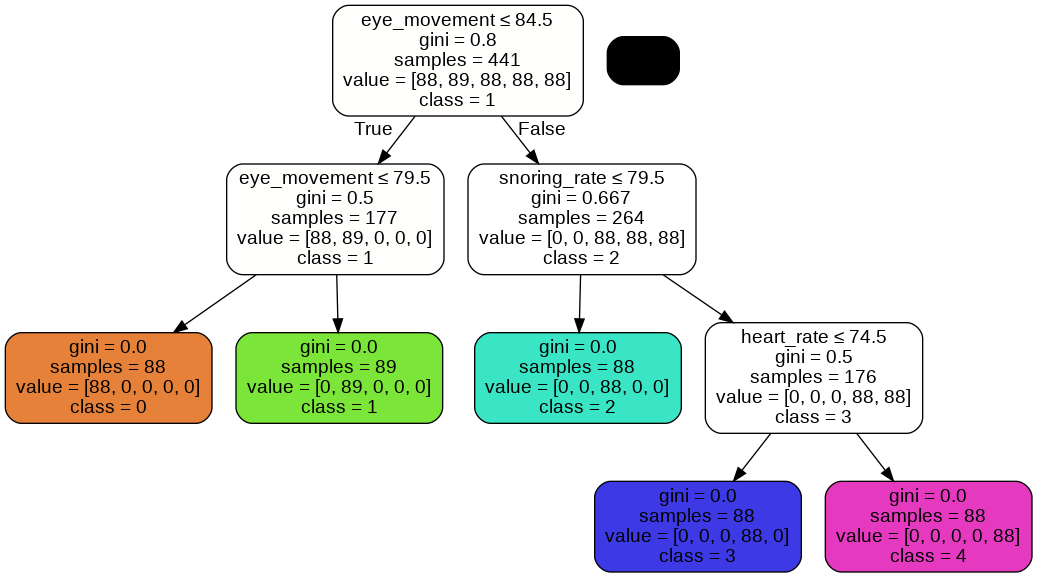

In [ ]:

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model_simple, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1', '2', '3', '4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree_img.png')
Image(graph.create_png())

**Data visualization**

In [ ]:
data_analyse = pd.read_csv('/content/drive/MyDrive/Human_Stress_Detection.csv')
data_analyse.rename(columns = {'sr':'snoring_rate', 'rr':'respiration_rate',
                        't':'body_temperature', 'lm':'limb_movement', 
                        'bo':'blood_oxygen', 'rem':'eye_movement', 
                        'sr.1':'sleeping_hours','hr':'heart_rate', 
                        'sl':'stress_level'}, inplace = True)


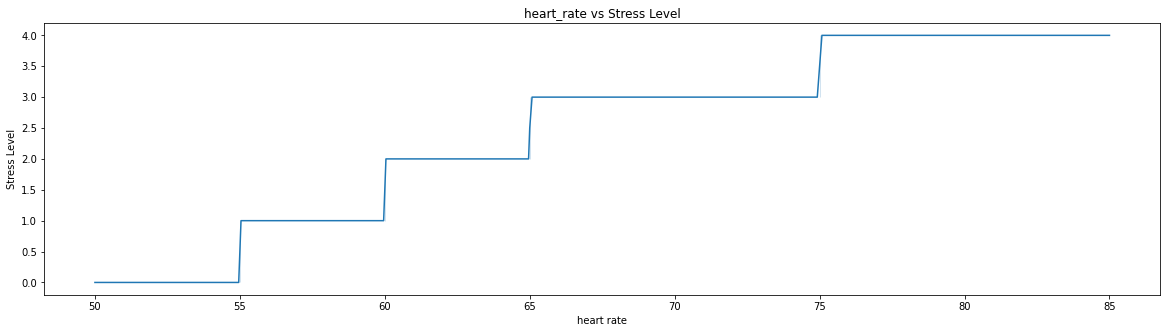

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,5))
sns.lineplot(x='heart_rate',y='stress_level',data=data_analyse)
plt.xlabel("heart rate")
plt.ylabel('Stress Level')
plt.title('heart_rate vs Stress Level')
plt.xticks(rotation=0)
plt.show()

**Convert decision tree to if-else**

In [ ]:
import numpy as np
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [feature_names[i] 
                    if i != _tree.TREE_UNDEFINED else "undefined!" 
                    for i in tree_.feature]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "    " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, np.argmax(tree_.value[node])))

    recurse(0, 1)

In [ ]:
tree_to_code(model_simple, feature_cols)

def tree(snoring_rate, respiration_rate, body_temperature, limb_movement, blood_oxygen, eye_movement, sleeping_hours, heart_rate):
    if eye_movement <= 84.5:
        if eye_movement <= 79.5:
            return 0
        else:  # if eye_movement > 79.5
            return 1
    else:  # if eye_movement > 84.5
        if snoring_rate <= 79.5:
            return 2
        else:  # if snoring_rate > 79.5
            if heart_rate <= 74.5:
                return 3
            else:  # if heart_rate > 74.5
                return 4


**Check converted if-else with test data**

with little modification I have used this code to build the hardware. You can check the changed code in decision_tree_raw/src/decision_tree.cpp file

In [ ]:
def tree(snoring_rate, respiration_rate, body_temperature, limb_movement, blood_oxygen, eye_movement, sleeping_hours, heart_rate):
    if eye_movement <= 84.5:
        if eye_movement <= 79.5:
            return 0
        else:  # if eye_movement > 79.5
            return 1
    else:  # if eye_movement > 84.5
        if snoring_rate <= 79.5:
            return 2
        else:  # if snoring_rate > 79.5
            if heart_rate <= 74.5:
                return 3
            else:  # if heart_rate > 74.5
                return 4


**The ture lable and predected label is same**

In [ ]:
Prediction = tree(67, 20768, 92768, 10768, 90768, 88, 3152, 61)
print('Prediction:', Prediction)

Prediction: 2
